In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
class Sigmoid():
  def __init__(this):
    this.layer_type= "activation"

  def forward(this, X):
    this.output = 1 / (1 + np.exp(-X))
    return this.output

  def backward(this, gradient):
    this.gradient = this.output * (1 - this.output) * gradient
    return this.gradient


class Layer():
  def __init__(this, input_size, layer_size, init="rand_zeros"):
    if init == "rand_zeros":
      this.W = np.random.rand(input_size, layer_size)
      this.b = np.zeros((1, layer_size))
    elif init == "randn_rand":
      this.W = np.random.randn(input_size, layer_size)
      this.b = np.random.rand(1, layer_size)
    this.layer_type= "layer"

  def forward(this, X):
    this.input = X
    this.output = np.matmul(X, this.W)
    return this.output

  def backward(this, gradient):
    this.dW = np.matmul(this.input.T, gradient)
    this.db = np.sum(gradient, axis=0)
    this.gradient = np.matmul(gradient, this.W.T)
    return this.gradient

  def optimize(this, learning_rate):
    this.W = this.W - this.dW * learning_rate
    this.b = this.b - this.db * learning_rate


class MSE():
  def __init__(this):
    pass

  def forward(this, y_pred, y_true):
    this.error = y_pred - y_true
    this.output = np.sum(this.error ** 2, axis=1)
    return this.output

  def backward(this):
    return this.error


class Model_Base():
  def __init__(this, sequential):
    this.sequential = sequential
    this.history = {"train_loss": [], "train_accuracy": [], "val_loss": [], "val_accuracy": []}

  def predict(this, X):
    for layer in this.sequential:
      X = layer.forward(X)
    return X

  def backward(this, gradient):
    for layer in reversed(this.sequential):
      gradient = layer.backward(gradient)

  def optimize(this, learning_rate):
    for layer in this.sequential:
      if layer.layer_type == "layer":
        layer.optimize(learning_rate)

  def fit(this, X, y, epochs, learning_rate, loss_fn, batch_size, val_data=None, print_info=False):
    # Training
    for i in range(epochs):
      indeces = np.random.choice(len(X), len(X), replace=False)
      for j in range(len(X) // batch_size):
        X_batch = X[indeces[j * batch_size : j * batch_size + 10]]
        y_batch = y[indeces[j * batch_size : j * batch_size + 10]]
        y_pred = this.predict(X_batch)
        loss = loss_fn.forward(y_pred, y_batch)
        gradient = loss_fn.backward()
        this.backward(gradient)
        this.optimize(learning_rate)
      # Saving and printing info
      y_pred_train = this.predict(X)
      loss_train = loss_fn.forward(y_pred_train, y)
      acc_train = accuracy(y_pred_train, y)
      this.history["train_loss"].append(np.sum(loss_train) / len(loss_train))
      this.history["train_accuracy"].append(acc_train)
      if type(val_data) != type(None):
        X_val, y_val = val_data
        y_pred_val = this.predict(X_val)
        loss_val = loss_fn.forward(y_pred_val, y_val)
        acc_val = accuracy(y_pred_val, y_val)
        this.history["val_loss"].append(np.sum(loss_val) / len(loss_val))
        this.history["val_accuracy"].append(acc_val)
        if print_info:
          print(f"Epoch: {i + 1} Train loss: {round(np.sum(loss_train) / len(loss_train), 2)} Train accuracy: {round(acc_train * 100, 2)}% Validation loss: {round(np.sum(loss_val) / len(loss_val), 2)} Validation accuracy: {round(acc_val * 100, 2)}%")
      elif print_info:
        print(f"Epoch: {i + 1} Train loss: {round(np.sum(loss_train) / len(loss_train), 2)} Train accuracy: {round(acc_train * 100, 2)}%")


def accuracy(y_pred, y_true):
  return np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1)) / len(y_pred)

# Papildoma užduotis 1

In [ ]:
class Model_ZeroHiddenLayers(Model_Base):
  def __init__(this):
    this.sequential = (
        Layer(2, 3),
        Sigmoid()
    )
    super().__init__(this.sequential)


class Model_TwoHiddenLayers(Model_Base):
  def __init__(this):
    this.sequential = (
        Layer(2, 32, "randn_rand"),
        Sigmoid(),
        Layer(32, 32, "randn_rand"),
        Sigmoid(),
        Layer(32, 3, "randn_rand"),
        Sigmoid()
    )
    super().__init__(this.sequential)

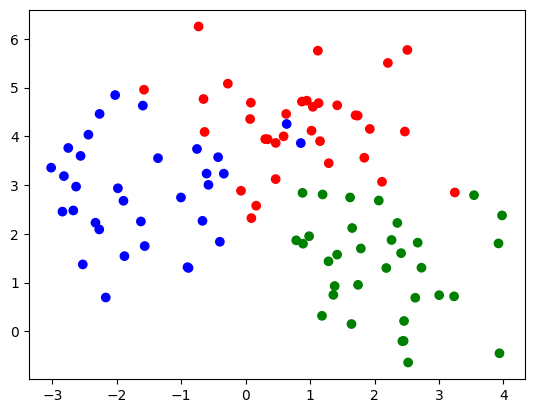

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, random_state=0)
y_encoded = np.array([[1 if j == i else 0 for j in range(3)] for i in y])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", 'g', 'b']));
plt.show()

### Vienasluoksnis

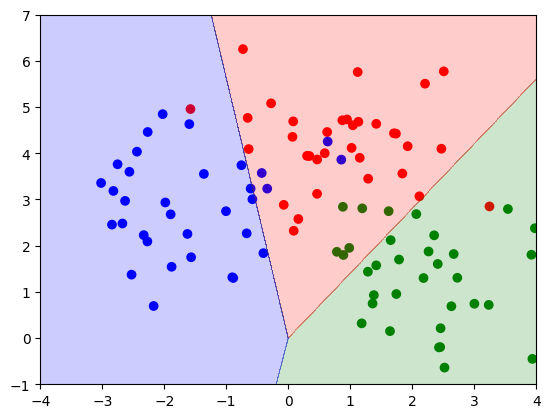

In [ ]:
model = Model_ZeroHiddenLayers()
pred = model.predict(X)
model.fit(X, y_encoded, epochs=10, learning_rate=0.1, loss_fn=MSE(), batch_size=10)

xx, yy = np.meshgrid(np.linspace(-4, 4, 2000), np.linspace(-1, 7, 2000))
X_test = np.c_[xx.ravel(), yy.ravel()]
pred = np.argmax(model.predict(X_test), axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", 'g', 'b']));
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(["r", 'g', 'b']))
plt.show()

### Daugiasluoksnis

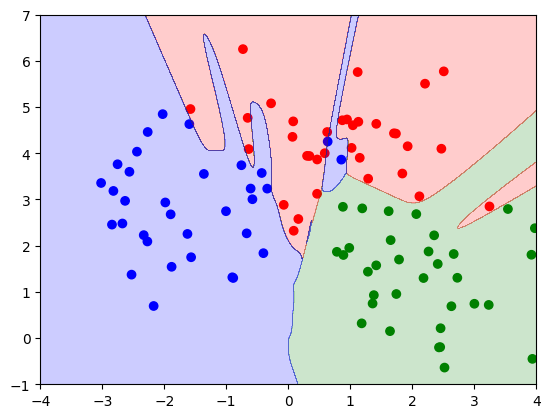

In [46]:
model = Model_TwoHiddenLayers()
model.fit(X, y_encoded, epochs=100000, learning_rate=0.15, loss_fn=MSE(), batch_size=10, print_info=False)

xx, yy = np.meshgrid(np.linspace(-4, 4, 2000), np.linspace(-1, 7, 2000))
X_test = np.c_[xx.ravel(), yy.ravel()]
pred = np.argmax(model.predict(X_test), axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", 'g', 'b']));
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(["r", 'g', 'b']))
plt.show()

# Papildoma užduotis 2

In [ ]:
class Model_ZeroHiddenLayers(Model_Base):
  def __init__(this):
    this.sequential = (
        Layer(2, 2),
        Sigmoid()
    )
    super().__init__(this.sequential)


class Model_TwoHiddenLayers(Model_Base):
  def __init__(this):
    this.sequential = (
        Layer(2, 8, "randn_rand"),
        Sigmoid(),
        Layer(8, 8, "randn_rand"),
        Sigmoid(),
        Layer(8, 2, "randn_rand"),
        Sigmoid()
    )
    super().__init__(this.sequential)

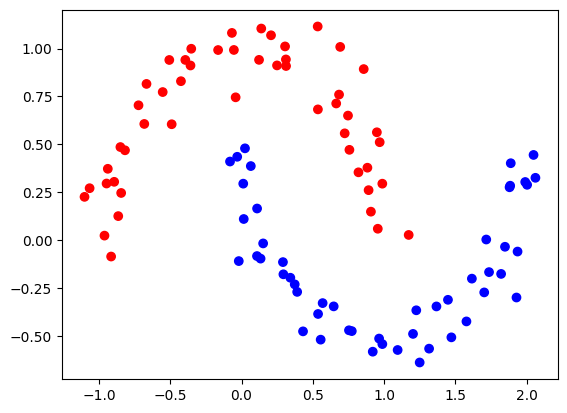

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(100, noise=0.1, random_state=0)
y_encoded = np.array([[1 if j == i else 0 for j in range(2)] for i in y])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "b"]));
plt.show()

### Vienasluoksnis

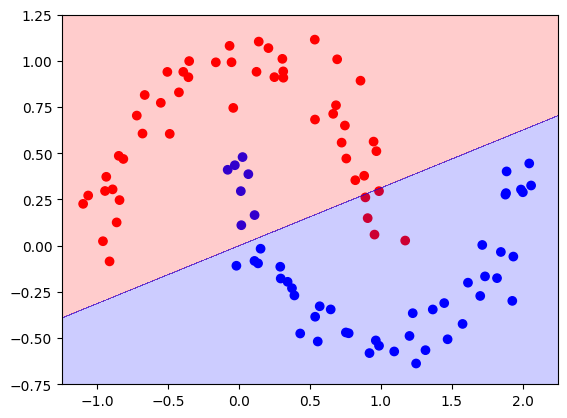

In [ ]:
model = Model_ZeroHiddenLayers()
model.fit(X, y_encoded, epochs=100, learning_rate=0.1, loss_fn=MSE(), batch_size=10, print_info=False)

xx, yy = np.meshgrid(np.linspace(-1.25, 2.25, 2000), np.linspace(-0.75, 1.25, 2000))
X_test = np.c_[xx.ravel(), yy.ravel()]
pred = np.argmax(model.predict(X_test), axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "b"]));
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(["r", "b"]))
plt.show()

### Daugiasluoksnis

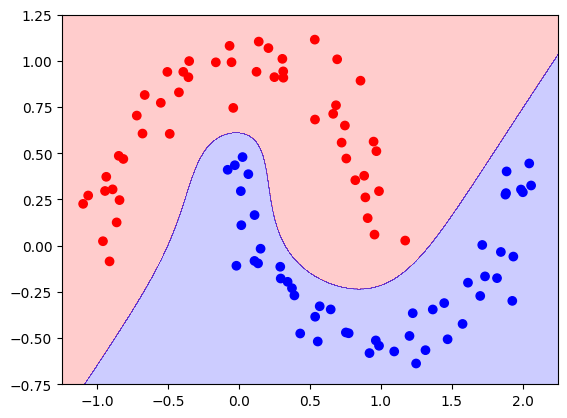

In [ ]:
model = Model_TwoHiddenLayers()
model.fit(X, y_encoded, epochs=1000, learning_rate=0.1, loss_fn=MSE(), batch_size=10, print_info=False)

xx, yy = np.meshgrid(np.linspace(-1.25, 2.25, 2000), np.linspace(-0.75, 1.25, 2000))
X_test = np.c_[xx.ravel(), yy.ravel()]
pred = np.argmax(model.predict(X_test), axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "b"]));
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(["r", "b"]))
plt.show()

# Papildoma užduotis 3

In [ ]:
class Model_OneHiddenLayers(Model_Base):
  def __init__(this):
    this.sequential = (
        Layer(2, 8),
        Sigmoid(),
        Layer(8, 2),
        Sigmoid()
    )
    super().__init__(this.sequential)

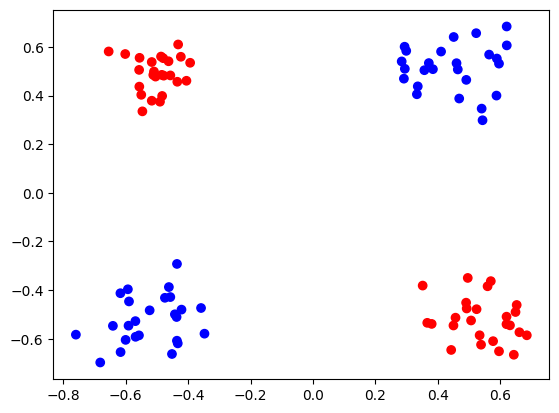

In [ ]:
X = np.c_[
      np.array([
          np.array([np.random.normal(-0.5, 0.1, 25), np.random.normal(0.5, 0.1, 25)]),
          np.array([np.random.normal(-0.5, 0.1, 25), np.random.normal(0.5, 0.1, 25)])
          ]).ravel(),
      np.array([
          np.array([np.random.normal(0.5, 0.1, 25), np.random.normal(-0.5, 0.1, 25)]),
          np.array([np.random.normal(-0.5, 0.1, 25), np.random.normal(0.5, 0.1, 25)])
          ]).ravel()
]
y = np.array([0] * 50 + [1] * 50)
y_encoded = np.array([[1 if j == i else 0 for j in range(2)] for i in y])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "b"]));

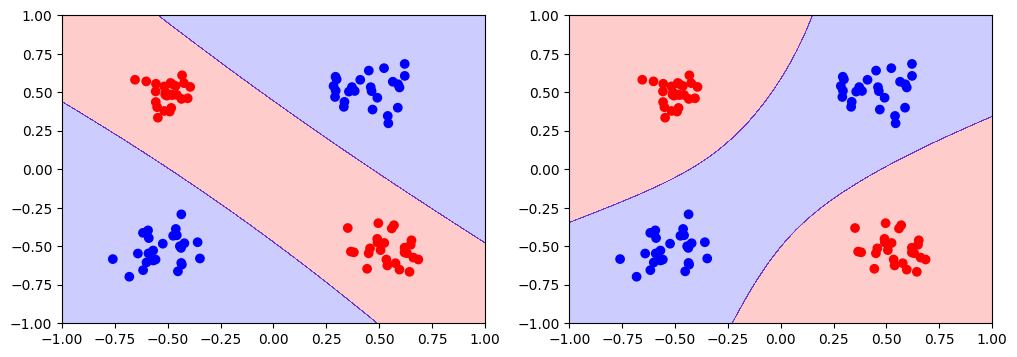

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax in axes:
  model = Model_TwoHiddenLayers()
  model.fit(X, y_encoded, epochs=100, learning_rate=0.1, loss_fn=MSE(), batch_size=10, print_info=False)

  xx, yy = np.meshgrid(np.linspace(-1, 1, 2000), np.linspace(-1, 1, 2000))
  X_test = np.c_[xx.ravel(), yy.ravel()]
  pred = np.argmax(model.predict(X_test), axis=1)

  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["r", "b"]));
  ax.contourf(xx, yy, pred.reshape(xx.shape), alpha=0.2, cmap=ListedColormap(["r", "b"]))